<a href="https://colab.research.google.com/github/iamchenchu/Deep-Learnig-with-TensorFlow/blob/main/01_Neural_Network_Regression_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction Regression with Neural Network in TensorFlow**

There are many definitions for the regression problem but in our case, we're going to simplify it. Predicting a number based few inputs called features and label called output

More simple : Predicting a number

In [35]:
# Import TensorFlow

import tensorflow as tf

print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.14.0
Notebook last run (end-to-end): 2023-11-25 19:37:51.253655


**Creating data to view and fit**

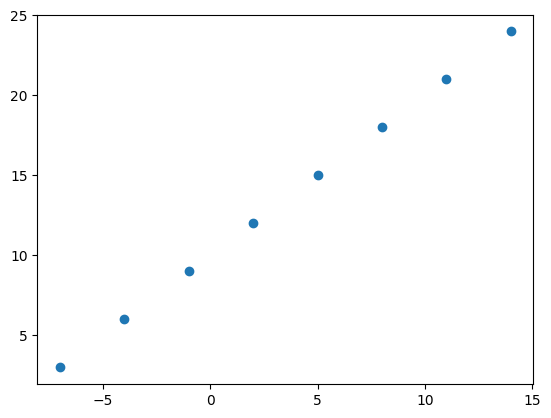

In [36]:
import numpy as np
import matplotlib.pyplot as plt

#Create features

X = np.array([-7.0, -4.0,-1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X,y)



In [16]:
y == X + 10 #if we closely observe the relation between above graph then we can realize as it is as true y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

**Input and Output Shapes**

In [17]:
#Create a demo tensor for our housing price prediction problems

house_info = tf.constant(["bedroom", "bathroom", "garage"]) # Shape would be 3
house_price = tf.constant([939700])   # Shape would be 1
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [37]:
house_info.shape

TensorShape([3])

In [18]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [19]:
X[0], y[0]

(-7.0, 3.0)

In [20]:
X[1], y[1]

(-4.0, 6.0)

In [29]:
# turn our numpy arrays as tensors with dtype float32

X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [30]:
input_shape = X[0].shape    # as scalar has shape 0 it will not give us the shape
output_shape = y[0].shape   # as scalar has shape 0 it will not give us the shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

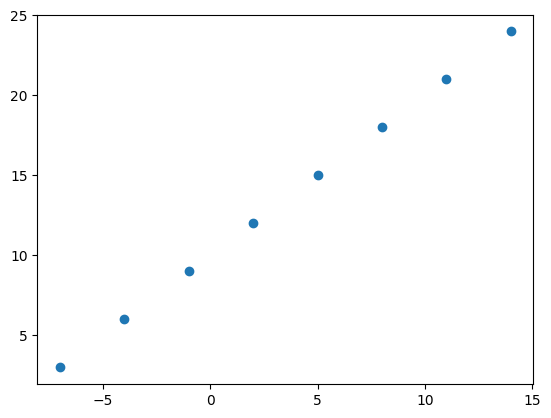

In [23]:
plt.scatter(X,y)

**Steps in modeling with TensorFlow**

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

**1.Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).

**2.Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

**3.Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

Let's see these in action using the Keras Sequential API to build a model for our regression data. And then we'll step through each.

Note: If you're using TensorFlow 2.7.0+, the fit() function no longer upscales input data to go from (batch_size, ) to (batch_size, 1). To fix this, you'll need to expand the dimension of input data using tf.expand_dims(input_data, axis=-1).

In our case, this means instead of using model.fit(X, y, epochs=5), use model.fit(tf.expand_dims(X, axis=-1), y, epochs=5).

In [38]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 872ms/step - loss: 11.8223 - mae: 11.8223
Epoch 2/5
1/1 [==============================] - 0s 25ms/step - loss: 11.6898 - mae: 11.6898
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 11.5573 - mae: 11.5573
Epoch 4/5
1/1 [==============================] - 0s 22ms/step - loss: 11.4248 - mae: 11.4248
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 11.2923 - mae: 11.2923


In [39]:
# Chench the X and y

X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [42]:
#Try and make a prediction using a model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 35ms/step


array([[11.174046]], dtype=float32)

In [43]:
y_pred + 11

array([[22.174046]], dtype=float32)

**Improving the model**

We can improve our model by altering the steps we taken to create our model

1. **Creating model** : here We might add more layers, increase the number of hidden layers, chnage the activation function of each layer.

2. **Compiling a model** : Here we might change the optimization function or perhaps the **Learning rate** of the optimization function.

3. **Fitting a model** : Here we might fit a model for more **Epochs** (Leave it training for longer) or on more data (Give the model more examples to learn from)

In [51]:

# Create a model using the Sequential API

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model

model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

# in the output it would be improved for better than before by just increasing the epochs to 100 training examples

Epoch 1/100
1/1 [==============================] - 1s 555ms/step - loss: 10.4640 - mae: 10.4640
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 10.3315 - mae: 10.3315
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 10.1990 - mae: 10.1990
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 10.0665 - mae: 10.0665
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 9.9340 - mae: 9.9340
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 9.8015 - mae: 9.8015
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 9.6690 - mae: 9.6690
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 9.5365 - mae: 9.5365
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 9.4040 - mae: 9.4040
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 9.2715 - mae: 9.2715
Epoch 11/100
1/1 [==============================] - 0s 11ms/

In [52]:
# Reming ourselves of the data

model.predict([17.0])

1/1 [==============================] - 0s 66ms/step


array([[29.836191]], dtype=float32)

In [59]:
#Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.1),
              metrics = ["mae"])

#fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 778ms/step - loss: 10.2309 - mae: 10.2309
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 9.7809 - mae: 9.7809
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 9.3309 - mae: 9.3309
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 8.8809 - mae: 8.8809
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 8.4310 - mae: 8.4310
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 7.9810 - mae: 7.9810
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 7.5310 - mae: 7.5310
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.0810 - mae: 7.0810
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 6.9000 - mae: 6.9000
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 6.8262 - mae: 6.8262
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - l

In [60]:
model.predict([17.0])

1/1 [==============================] - 0s 93ms/step


array([[27.255775]], dtype=float32)

In [74]:
# Create the model with the extra layers which are hidden

#Creare a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = None),  # We can use any kind of activation
    #tf.keras.layers.Dense(1000, activation = "relu"),
    tf.keras.layers.Dense(1)
])

#Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics =["mae"])

#Fit the model
model.fit(tf.expand_dims(X, axis =-1), y, epochs = 100) # it would get more optimized after this modiciation by adding 1 more hidden layer with 100 neurons


Epoch 1/100
1/1 [==============================] - 1s 580ms/step - loss: 13.0956 - mae: 13.0956
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 12.5909 - mae: 12.5909
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 12.0828 - mae: 12.0828
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.5686 - mae: 11.5686
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 11.0457 - mae: 11.0457
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5113 - mae: 10.5113
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 9.9628 - mae: 9.9628
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 9.3972 - mae: 9.3972
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 8.8118 - mae: 8.8118
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 8.2034 - mae: 8.2034
Epoch 11/100
1/1 [==============================] - 0s 1

In [72]:
#Let's remind ourselves of the data

X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [75]:
model.predict([17])

#1/1 [==============================] - 0s 37ms/step
#array([[32.63552]], dtype=float32). before this model was better than this but this is better than the initial one


1/1 [==============================] - 0s 102ms/step


array([[31.879534]], dtype=float32)

**Evaluating the Models**

1. In Practice a typical work flow u go through in building the neural networks model is : Build a model -> fit it -> evaluate it -> tweak a model. -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ......

2. When it comes to evaluation... there are 3 words you should momorize : "Visualize, visualize, visualize"

3. When it comes to building a model...u should keep in mind that u have to "Experiment Experiment and Experiment until u get the expected result"

**It's a goof idea to visualize :**

* The data -> what data are we working with ? what does it look like
* The model itself -> what does our model look like ?
* The training model -> How does the model perform while it learns ?
* The predictions of the model ->  How do the predictions of a model line up against the ground truth(Labels) ?



In [76]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [78]:
# Make labels for the data
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

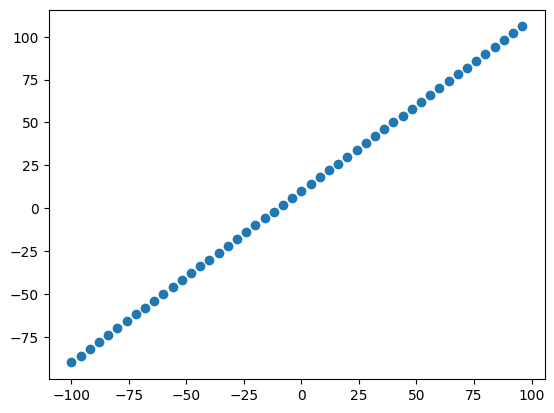

In [79]:
# Visualize the data

import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

*** Training Set** - The model learns from this data, which is typically 70 - 80% of the total data u have available

*** Validation Set** - The model gets tuned on this data, which is typically 10 - 15% of the data available

*** Test Set** - the model gets evaluated on this data to test what it has learned, this set typically 10 - 15% of the total data available.

In [81]:
## Check the length of how many data samples we have

len(X) #Usually we will have more than 100 but we have 50 as of now

50

In [85]:
# Split the data into train and test sets
X_train = X[:40] # First 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # Last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

**Visualizing the data**

* Now we've got our training and test data sets.. Let's visualize them again to have better understanding


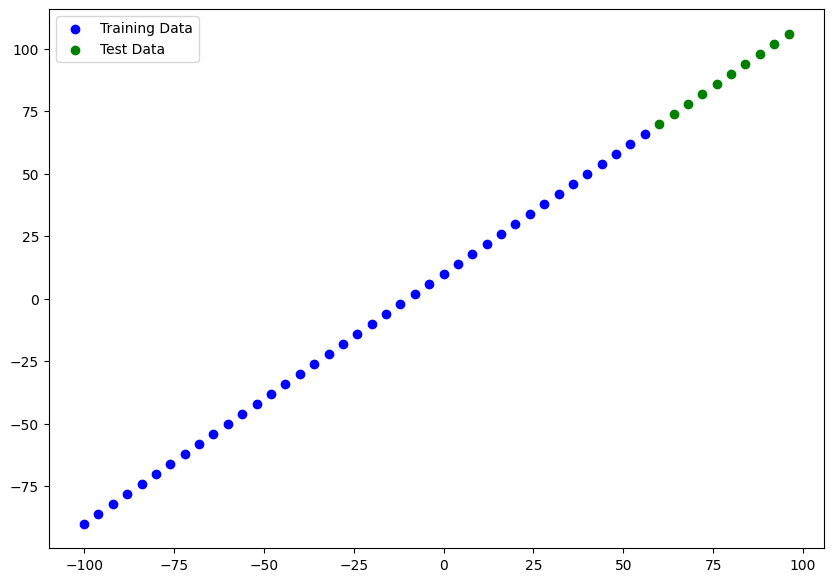

In [92]:
plt.figure(figsize=(10,7)) #

#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label = "Training Data")  # c = "b" means color blue

#Plot test data in green
plt.scatter(X_test, y_test, c="g", label = "Test Data") # c = "g" means color green
plt.legend() # Gives the labels within the graph

In [98]:
# Let's have a look at how to create the neural Netwrok

#1.Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model

model.compile(loss = "mae", # or loss = tf.keras.losses.mae
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fit the model

model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100) # can also build the models using the build() or fit()


Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 13.5718 - mae: 13.5718
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 8.4005 - mae: 8.4005
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 10.5479 - mae: 10.5479
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 13.0658 - mae: 13.0658
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 12.1255 - mae: 12.1255
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.3783 - mae: 9.3783
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5261 - mae: 8.5261
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0346 - mae: 9.0346
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.6522 - mae: 18.6522
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.0545 - mae: 10.0545
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - l

#Visualizing the model

In [99]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [138]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer

tf.random.set_seed(42)

#1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"),
    tf.keras.layers.Dense(1, name = "output_layer")
],name ="CHENCHU_MODEL")

#2 compile the model

model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#3 Fit the model





In [134]:
model.summary()

Model: "CHENCHU_MODEL"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_shape (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**ELABORATION OF THE SUMMARY**

***Total params:** Total number of parameters in the model

 ***Trainable params:** These are the parameters (Patterns) the model can update as it trains

***Non-trainable params:** these parameters aren't updated during the training(this is typical when you bring in already learn patterns or parameters from other models during the transfer learning)

**Resource :**  For more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video https://youtu.be/QDX-1M5Nj7s

**Excercise :**  Try playing with the number of hidden units in the dense layer see how that effects the number of parameters (Total and trainable ) by calling model.summary()

In [139]:
#Let's fit our model to the training the data

model.fit(X_train, y_train, epochs = 100, verbose=0) # Verbosity mode  0 = Silent 1= progress bar 2 = one line per epoch


In [140]:
# Get the model summary
model.summary()

Model: "CHENCHU_MODEL"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


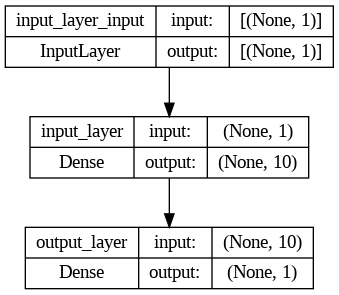

In [141]:
# We can also visualize the data using the plot_model from utils

from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)